W mean value is 0.5103818038993035
b mean value is 6.234221592899288
[1.] [5.]
<tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([1.])> <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([5.])>
Still running, current step is: 500
Still running, current step is: 1000
Still running, current step is: 1500
Still running, current step is: 2000
Still running, current step is: 2500
Still running, current step is: 3000
Still running, current step is: 3500
Still running, current step is: 4000
Still running, current step is: 4500
Still running, current step is: 5000
The regression doesn't converge!
After 5000 steps, W is 0.64, b is 5.52
Runtime of the program is 13.02318525314331


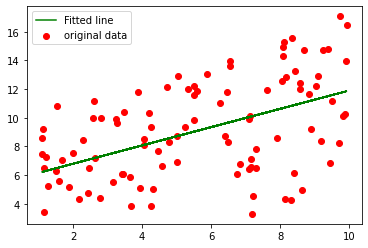

In [109]:
# This program will demo a simple linear regression using Tensorflow. The training data is randomly generated. 
# The random data is using uniform distributed data 
# The learning rate is fixed. 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time 


# Parameters
rng = np.random
learning_rate = 0.001
training_step = 5000
display_step = 500
n_samples=100

testResult="NOK"

# Training Data

#generate random distribution of w and b
w_dis=np.random.uniform(0,1,n_samples)
b_dis=np.random.uniform(2,10,n_samples)

w_constant=np.mean(w_dis)
b_constant=np.mean(b_dis)

print("W mean value is",w_constant)
print("b mean value is",b_constant)

#construct input X and output Y
X=np.random.uniform(1,10,n_samples)
Y=np.multiply(X,w_dis)+b_dis

# Define TF variable W and b
# Instead of using random value, we can use defined initial value of W and b
W=tf.Variable([1],dtype=tf.float64)
b=tf.Variable([5],dtype=tf.float64)
# W = tf.Variable(rng.randn(1))
# b = tf.Variable(rng.randn(1))

print(W.numpy(),b.numpy())
print(W,b)

# Define Linea regression
def linear_regression(x):
    return W*x + b
# mean squre error
def mean_square(y_pred,y_value):
    return tf.reduce_sum(tf.pow(y_pred-y_value,2))/(2*n_samples)
# defing optimizer
optimizer = tf.optimizers.SGD(learning_rate)

# Optimization process
def run_optimization():
    with tf.GradientTape() as g:
        pred  = linear_regression(X)
        loss = mean_square(pred, Y)
        
    gradients = g.gradient(loss,[W,b])
    optimizer.apply_gradients(zip(gradients,[W,b]))

# Calculating 
start=time.time()
for step in range(1,training_step + 1):
    run_optimization()
    if step % display_step == 0:
        print("Still running, current step is:", step)
    if (abs(W-w_constant)<0.05) & (abs(b-b_constant)<0.05):
        pred = linear_regression(X)
        loss = mean_square(pred,Y)
        print("Running step======>",step)
        print("Step: %i, loss: %f, W: %F, b: %f" % (step,loss,W.numpy(),b.numpy()))
        testResult="OK"
        break
if testResult=="NOK":
    print("The regression doesn't converge!")
    print("After %d steps, W is %.2f, b is %.2f" % (training_step, W, b))
end=time.time()
print(f"Runtime of the program is {end - start}")
        
plt.scatter(X,Y,c='r',label="original data")
plt.plot(X,np.array(W*X + b),c='g',label='Fitted line')
plt.legend()
plt.show()
